# Modified Grover operator for quantum amplitude estimation


## Contributors

Based on the paper [Modified Grover operator for amplitude estimation](https://arxiv.org/abs/2010.11656). 

Shumpei Uno, Yohichi Suzuki, Keigo Hisanaga, Rudy Raymond, Tomoki Tanaka, Tamiya Onodera, and Naoki Yamamoto.


## Summary

This notebook contains experiments for performing amplitude estimation without inverse Quantum Fourier Transform (QFT) and controlled Q-operators (a.k.a. Grover operators).
It is known that without QFT and such controlled operators, the number of two-qubit gates (e.g., CNOT gates) required for running amplitude estimation can be reduced, and hence may be more appropriate to run quantum algorithms on Noisy Intermediate Scale Quantum (NISQ) devices.
Here, the Grover operator used here is the modified one provided by the paper above, which would reach the higher accuracy under the depolarization error.

## Modified Amplitude Amplification Operator

### Operator

The modified amplitude amplification operator is defined as:
$$Q=U_{0} A^{\dagger} U_{f} A$$
while the conventional amplitude amplification operator is like:
$$G=A U_{0} A^{\dagger} U_{f}$$

### Result after $m$ Iterations
Application of $Q^m$ on the initial
state $\left|0\right>^{n+1}$ produces
\begin{eqnarray}
\left|\psi_{Q}\left(\theta, N_{\mathrm{q}}\right)\right\rangle:=Q^{m}|0\rangle_{n+1}=\cos \left(N_{\mathrm{q}} \theta\right)|0\rangle_{n+1}+\sin \left(N_{\mathrm{q}} \theta\right)|\phi\rangle_{n+1}
\end{eqnarray}
where
\begin{eqnarray}
\begin{aligned}
|\phi\rangle_{n+1} &=A^{\dagger}\left(-\sin \theta\left|\psi_{0}\right\rangle_{n}|0\rangle+\cos \theta\left|\psi_{1}\right\rangle_{n}|1\rangle\right) \\
&=\frac{1}{\sin 2 \theta}(Q-\cos 2 \theta)|0\rangle_{n+1}
\end{aligned}
\end{eqnarray}
and $N_q = 2m$.

### Measurement Operators
The set of measurement operators
$$E_{Q, 0}=|0\rangle_{n+1}\left\langle\left. 0\right|_{n+1}\right.$$
$$E_{Q, 1}=\mathbf{I}_{n+1}-E_{Q, 0}$$
distinguishes whether all qubits are 0 or not.

Measuring the state $\left|\psi_{Q}\left(\theta, N_{\mathrm{q}}\right)\right\rangle$ via $\left\{E_{Q, 0}, E_{Q, 1}\right\}$ yields the probability distribution as
\begin{eqnarray}
\begin{array}{l}
p_{Q}\left(0 ; \theta, N_{\mathrm{q}}\right)=\cos ^{2}\left(N_{\mathrm{q}} \theta\right) \\
p_{Q}\left(1 ; \theta, N_{\mathrm{q}}\right)=\sin ^{2}\left(N_{\mathrm{q}} \theta\right)
\end{array}
\end{eqnarray}


### Circuit Implementation
For the label $\left|x\right>_n$ in computational basis, the operator $A$ maps $\left|0\right>_n\left|0\right>$ to
<!-- $\left|x\right>_n\left|0\right>$ to
\begin{eqnarray}
A \left|x\right>_n\left|0\right> 
&=& \left|x\right>_n \left( \sqrt{f(x)} \left|1\right> + \sqrt{1-f(x)} \left|0\right>\right) \\
&=& \left|x\right>_n \left( \sqrt{a} \left|1\right> + \sqrt{1-a} \left|0\right>\right)\\
&=& \left|x\right>_n \left( \sin\theta \left|1\right> + \cos\theta \left|0\right>\right)
\end{eqnarray}
-->
$$A|0\rangle_{n+1}=\cos \theta\left|\psi_{0}\right\rangle_{n}|0\rangle+\sin \theta\left|\psi_{1}\right\rangle_{n}|1\rangle$$
where $a=\sin^2\theta$.
Here, $A$ can be realized with controlled-$Y$ rotation gates.

## Introduction

We consider applying amplitude estimation, one of the most popular quantum algorithms, for Monte Carlo integration, a problem which is essential for financial applications. The purpose of Monte Carlo integration is to compute the expected value of a real-valued function $f$. Here, for simplicity we assume $f$ takes an $n$-bit input $x \in \{0,1\}^n$, $0 \le f(x) \le 1$, and the probability of $f(x)$ is $p(x)$. Then, the expected value is 
$$
\mathbb{E}[f(x)] = \sum_{x=0}^{2^n-1} p(x) f(x)
$$

To compute the Monte Carlo integration of $f$, let us assume that quantum circuits $\mathcal{P}$ and $\mathcal{R}$, that perform the following transformation, are given. 
\begin{eqnarray}
\mathcal{P} \left|0\right>_n &=& \sum_{x} \sqrt{p(x)} \left|x\right>_n\\
\mathcal{R} \left|x\right>_n\left|0\right> &=& \left|x\right>_n \left( \sqrt{f(x)} \left|1\right> + \sqrt{1-f(x)} \left|0\right>\right) 
\end{eqnarray}
The former is for creating probability distribution $p(\cdot)$, and the latter for computing $f(\cdot)$. 


## Integral of sine functions

Following Section 4.2 of ["Amplitude Estimation without Phase Estimation", by Suzuki et al.](https://arxiv.org/abs/1904.10246), we consider the following integral 
$$
\mathcal{I} = \frac{1}{b_\mbox{max}}\int_{0}^{b_\mbox{max}} \sin^2{x}~dx = \frac 1 {b_{max}}\left(\frac {b_{max}} 2 - \frac 1 4 \sin(2b_{max})\right)
$$
which is approximated with the following summation

$$
\mathcal{S} = \sum_{x=0}^{2^n-1} \frac{1}{2^n} \sin^2{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)}.
$$

This means, we the quantum circuits $\mathcal{P}$ and $\mathcal{R}$ are
\begin{eqnarray}
\mathcal{P} \left|0\right>_n \left|0\right> &=& \frac{1}{\sqrt{2^n}} \sum_{x} \left|x\right>_n \left|0\right>\\
\mathcal{R} \left|x\right>_n\left|0\right> &=& \left|x\right>_n \left(    \sin{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)} \left|1\right> +   \cos{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)} \left|0\right>\right).
\end{eqnarray}

$\mathcal{P}$ can be realized with Hadamard gates, and $\mathcal{R}$ with controlled-$Y$ rotation gates. 

### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 20  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.00032892188007927603


### Implementing circuits for Monte Carlo integration of sine functions

Below are the functions to compute $\mathcal{P}$, $\mathcal{R}$, and their inverses.

In [2]:
# OK
def P(qc, qx, nbit):
    """
        Generating uniform probability distribution
            qc: quantum circuit
            qx: quantum register
            nbit: number of qubits
        The inverse of P = P
    """
    qc.h(qx)

# OK
def R(qc, qx, qx_measure, nbit, b_max):
    """
        Computing the integral function f()
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            nbit: number of qubits
            b_max: upper limit of integral            
    """
    qc.ry(b_max / 2**nbit * 2 * 0.5, qx_measure)
    for i in range(nbit):
        qc.cu3(2**i * b_max / 2**nbit * 2, 0, 0, qx[i], qx_measure[0])

# OK
def Rinv(qc, qx, qx_measure, nbit, b_max):
    """3
        The inverse of R
            qc: quantum circuit
            qx: quantum register
            qx_measure : quantum register for measurement
            nbit: number of qubits
            b_max: upper limit of integral
    """
    for i in range(nbit)[::-1]:
        qc.cu3(-2**i * b_max / 2**nbit * 2, 0, 0, qx[i], qx_measure[0])
    qc.ry(-b_max / 2**nbit * 2 * 0.5, qx_measure)

### Grover Operators for Amplitude Estimation

We can easily build quantum circuits for fast computation of the Monte Carlo integration as below. Here, we show functions to construct quantum circuits running with simulators. Running them on real devices should be easy by adjusting the parameters of the functions.  

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [4]:
import sys
sys.path.append('../libmitigation')
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
import importlib
import tensor_filter
importlib.reload(tensor_filter)
from tensor_filter import *

In [5]:
# OK
def reflect(qc, qx, qx_measure, qx_ancilla, nbit, b_max):
    """
        Computing reflection operator (I - 2|0><0|)
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            qx_ancilla: temporal quantum register for decomposing multi controlled NOT gate
            nbit: number of qubits
            b_max: upper limit of integral
    """
    for i in range(nbit):
        qc.x(qx[i])
    qc.x(qx_measure[0])
    qc.barrier()    #format the circuits visualization
    # multi_control_NOT(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
    qc.h(qx_measure)
    qc.mcx(qx, qx_measure)
    qc.h(qx_measure)
    qc.barrier()    #format the circuits visualization
    qc.x(qx_measure[0])
    for i in range(nbit):
        qc.x(qx[i])


# OK
# This is to implement Grover Operator
def Q_grover(qc, qx, qx_measure, qx_ancilla, nbit, b_max):
    """
        The Grover operator: R P (I - 2|0><0|) P^+ R^+ U_psi_0 
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            qx_ancilla: temporal quantum register for decomposing multi controlled NOT gate
            nbit: number of qubits
            b_max: upper limit of integral
    """
    P(qc, qx, nbit)
    qc.barrier()    #format the circuits visualization
    R(qc, qx, qx_measure, nbit, b_max)
    qc.z(qx_measure[0])
    Rinv(qc, qx, qx_measure, nbit, b_max)
    qc.barrier()    #format the circuits visualization
    P(qc, qx, nbit)
    qc.barrier()    #format the circuits visualization
    reflect(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
    qc.barrier()    #format the circuits visualization

## Amplitude Estimation without Phase Estimation

To run the amplitude estimation without phase estimation of [Suzuki et al.](https://arxiv.org/abs/1904.10246), we must create quantum circuits that run Grover operators with various number of iterations. The function for creating such circuits is as the following.

In [6]:
# OK
def create_grover_circuit(numebr_grover_list, nbit, b_max):
    """
        To generate quantum circuits running Grover operators with number of iterations in number_grover_list
            numebr_grover_list: list of number of Grover operators
            nbit: number of qubits (2**nbit = ndiv is the number of discretization in the Monte Carlo integration)
            b_max: upper limit of integral
        Return:
            qc_list: quantum circuits with Grover operators as in number_grover_list
    """
    qc_list = []
    for igrover in range(len(numebr_grover_list)):
        qx = QuantumRegister(nbit)
        qx_measure = QuantumRegister(1)
        cr = ClassicalRegister(nbit + 1) # modified grover
        qc = QuantumCircuit(qx, qx_measure, cr)
        qx_ancilla = QuantumRegister(1)
        for ikAA in range(numebr_grover_list[igrover]):
            Q_grover(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
        qc.measure(qx, cr[:-1]) # modified grover
        qc.measure(qx_measure, cr[-1])# modified grover
        qc_list.append(qc)
    return qc_list

For example, quantum circuit with two Grover operators is shown below.

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/visualization/matplotlib.py:291: DeprecationWarning: style option/s (usepiformat, cregbundle, compress) is/are not supported
  set_style(current_style, style)


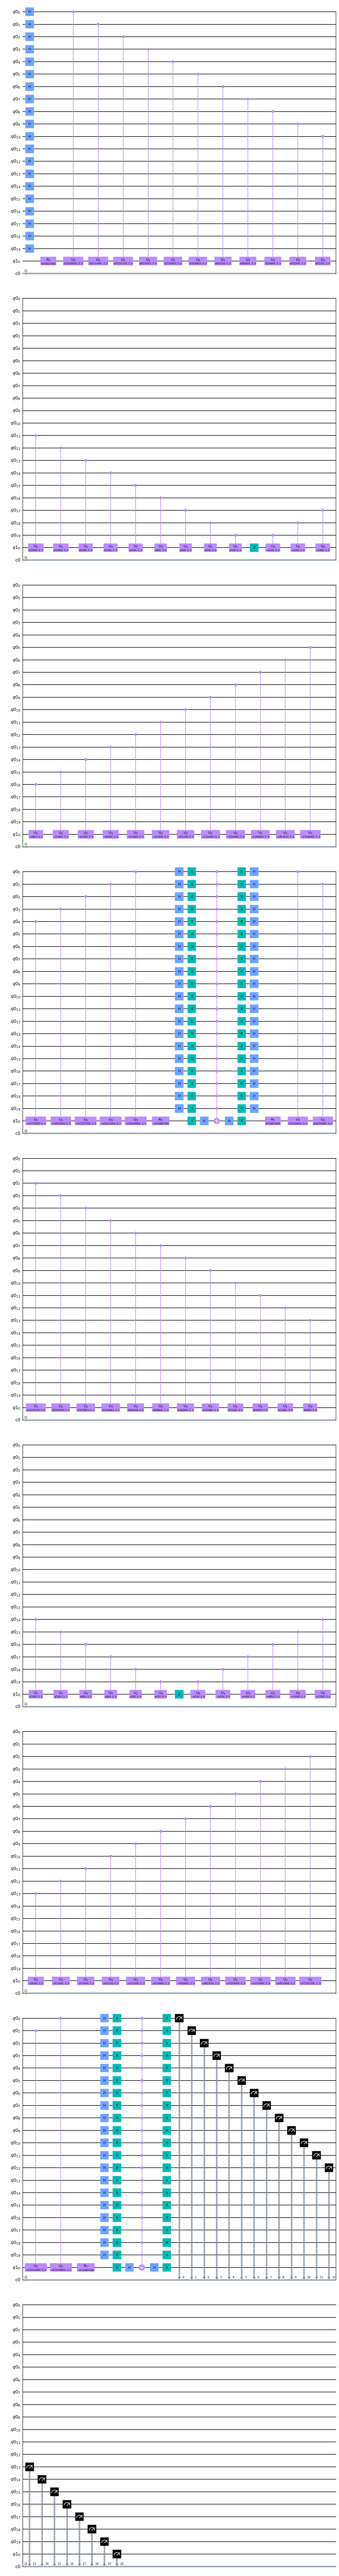

In [7]:
qc_list = create_grover_circuit([2], nbit, b_max)
my_style = {'usepiformat': True, 'cregbundle': True,'compress': True }
qc_list[0].draw(output="mpl", style=my_style, plot_barriers=False )

We also need a helper function to simultaneously run the quantum circuits that are returned by the above functions, as below. 

In [8]:
# OK
def run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=None):
    """
        Run the quantum circuits returned by create_grover_circuit()
            qc_list: list of quantum circuits
            numebr_grover_list: list of number of Grover operators
            shots_list:  list of number of shots
            backend: name of backends
        
        Return:
            hit_list: list of count of obserbving "1" for qc_list
    """
    counts_list = []
    for k in range(len(number_grover_list)):
        t1 = time.time()
        print(k,"th round with", number_grover_list[k],"oracles")
        job = execute(qc_list[k], backend=backend, shots=shots_list[k], noise_model=noise_model)
        lapse = 0
        interval = 0.00001
        time.sleep(interval)
        while job.status().name != 'DONE':
            time.sleep(interval)
            lapse += 1
        counts_list.append(job.result().get_counts(qc_list[k]))
        t2 = time.time()
        print(t2 - t1, "s")
    return counts_list

In [9]:
def make_hit_list(counts_list):
    hit_list = []
    for k in range(len(counts_list)):
        hits = counts_list[k].get("0"*(nbit+1), 0)
        hit_list.append(hits)
    return hit_list

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [10]:
#setting the number of shots and Grover operators.

# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [i for i in range(100)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [11]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.91, 0.09],[0.09,0.91]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [12]:
# qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [13]:
# counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model)  # list of number of grover operators

0 th round with 0 oracles
1.398164987564087 s
1 th round with 1 oracles
0.6629912853240967 s
2 th round with 2 oracles
0.8230838775634766 s
3 th round with 3 oracles
1.0418031215667725 s
4 th round with 4 oracles
1.3946011066436768 s
5 th round with 5 oracles
1.5737810134887695 s
6 th round with 6 oracles
2.32649302482605 s
7 th round with 7 oracles
2.0007548332214355 s
8 th round with 8 oracles
3.1108930110931396 s
9 th round with 9 oracles
2.8576557636260986 s
10 th round with 10 oracles
2.629589080810547 s
11 th round with 11 oracles
2.9715471267700195 s
12 th round with 12 oracles
3.7992162704467773 s
13 th round with 13 oracles
3.5514729022979736 s
14 th round with 14 oracles
4.5991950035095215 s
15 th round with 15 oracles
3.8627450466156006 s
16 th round with 16 oracles
5.634116888046265 s
17 th round with 17 oracles
7.349918365478516 s
18 th round with 18 oracles
7.361952781677246 s
19 th round with 19 oracles
6.32032585144043 s
20 th round with 20 oracles
8.462574243545532 s
2

In [14]:
# import pickle
# with open("raw_result_20_009_009.pkl", "wb") as f:
#     pickle.dump(counts_list, f)

In [12]:
import pickle
with open("raw_result_20_009_009.pkl", "rb") as f:
    counts_list = pickle.load(f)

In [13]:
hit_list = make_hit_list(counts_list)
print(hit_list)

[10, 19, 16, 17, 18, 3, 14, 12, 8, 10, 11, 6, 8, 12, 8, 9, 8, 15, 6, 12, 8, 5, 8, 10, 12, 8, 4, 3, 5, 6, 7, 3, 4, 2, 4, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 3, 0, 2, 3, 3, 3, 4, 8, 9, 4, 4, 12, 5, 6, 6, 6, 5, 5, 6, 8, 8, 11, 9, 15, 12, 13, 11, 10, 13, 12, 15, 12, 18, 22, 11, 12, 12, 15, 17, 10, 7, 17, 17, 10, 10, 14, 15, 10, 12]


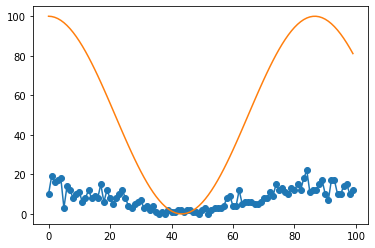

In [14]:
divide = 100
plt.plot(number_grover_list, hit_list, marker="o")
plt.plot(np.linspace(0,number_grover_list[-1], divide), divide * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2)

In [15]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)
meas_filter = TensoredMitigation(nbit+1, meas_fitter.cal_matrices, mit_pattern)

In [16]:
x_tilde_S_lm_0_list = [] # K = 0
for counts in counts_list:
    x_tilde = meas_filter.apply(counts, method="x_tilde_s_lm_s")
    x_tilde_S_lm_0_list.append(x_tilde)
mit_hit_S_lm_0_list = make_hit_list(x_tilde_S_lm_0_list)
print(mit_hit_S_lm_0_list)

Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.897497400270114
t2 - t1: 0.20805788040161133
t3 - t2: 0.0003190040588378906
sum of mitigated probability vector x_hat_s: 6.897497467841659
t4 - t3: 0.002821207046508789
number of positive values:  74
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.426768172375033
t2 - t1: 0.19679689407348633
t3 - t2: 0.00038504600524902344
sum of mitigated probability vector x_hat_s: 6.426768274972098
t4 - t3: 0.002707958221435547
number of positive values:  61
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 5.958710001952471
t2 - t1: 0.1826770305633545
t3 - t2: 0.00029587745666503906
sum of mitigated probability vector x_hat_s: 5.95871002061407
t4 - t3: 0.0028111934661865234
number of positive values:  60
main 

sum of mitigated probability vector x_s: 6.477444248898075
t2 - t1: 0.23322224617004395
t3 - t2: 0.00027871131896972656
sum of mitigated probability vector x_hat_s: 6.477444366084171
t4 - t3: 0.0033881664276123047
number of positive values:  73
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 7.036149371545075
t2 - t1: 0.2769942283630371
t3 - t2: 0.0002951622009277344
sum of mitigated probability vector x_hat_s: 7.036149442937629
t4 - t3: 0.003348827362060547
number of positive values:  85
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.923437572292216
t2 - t1: 0.2763369083404541
t3 - t2: 0.00030803680419921875
sum of mitigated probability vector x_hat_s: 6.923437749417966
t4 - t3: 0.0031850337982177734
number of positive values:  72
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier 

sum of mitigated probability vector x_s: 6.836501818722376
t2 - t1: 0.23526597023010254
t3 - t2: 0.000308990478515625
sum of mitigated probability vector x_hat_s: 6.836501759541455
t4 - t3: 0.004390239715576172
number of positive values:  71
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.809847746953274
t2 - t1: 0.2510988712310791
t3 - t2: 0.0003859996795654297
sum of mitigated probability vector x_hat_s: 6.809847806894511
t4 - t3: 0.003122091293334961
number of positive values:  76
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 7.385292049691626
t2 - t1: 0.27437520027160645
t3 - t2: 0.0006279945373535156
sum of mitigated probability vector x_hat_s: 7.3852919258170795
t4 - t3: 0.0030379295349121094
number of positive values:  77
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + 

sum of mitigated probability vector x_s: 6.560938520844484
t2 - t1: 0.2083430290222168
t3 - t2: 0.0002980232238769531
sum of mitigated probability vector x_hat_s: 6.560938578252282
t4 - t3: 0.0027611255645751953
number of positive values:  70
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.21105842773368
t2 - t1: 0.21449494361877441
t3 - t2: 0.00035500526428222656
sum of mitigated probability vector x_hat_s: 6.211058539864768
t4 - t3: 0.0029401779174804688
number of positive values:  67
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 6.732988730426146
t2 - t1: 0.17600011825561523
t3 - t2: 0.00041484832763671875
sum of mitigated probability vector x_hat_s: 6.732988770180319
t4 - t3: 0.002607107162475586
number of positive values:  69
main process: Done!
Restriction to labels of y + efficient Lagrange Multiplier 

In [17]:
x_tilde_S_list = [] # K = 0
for counts in counts_list:
    x_tilde = meas_filter.apply(counts, method="x_tilde_s")
    x_tilde_S_list.append(x_tilde)
mit_hit_S_list = make_hit_list(x_tilde_S_list)
print(mit_hit_S_list)

Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 6.897497400270114
number of positive values:  74
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 6.426768172375033
number of positive values:  61
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 5.958710001952471
number of positive values:  60
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 5.812931003590635
number of positive values:  60
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 5.50574354474725
number of positive values:  58
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 7.281751303833201
number of positive values:  80
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s:

sum of mitigated probability vector x_s: 6.710641685338986
number of positive values:  69
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 7.305338301466493
number of positive values:  76
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 7.374959881102664
number of positive values:  82
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 6.965773390594053
number of positive values:  72
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 7.36023032993676
number of positive values:  74
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 6.458765188188492
number of positive values:  67
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 7.800902311043996
number of positive value

In [20]:
import pickle
with open("hit_list_20_009_009.pkl", "wb") as f:
    pickle.dump(hit_list, f)

In [21]:
import pickle
with open("mit_hit_S_list_20_009_009.pkl", "wb")as f:
    pickle.dump(mit_hit_S_list, f)

In [18]:
import pickle
with open("mit_hit_S_lm_0_list_20_009_009.pkl", "wb")as f:
    pickle.dump(mit_hit_S_lm_0_list, f)

Text(0, 0.5, 'number of shots for $|00...0>$')

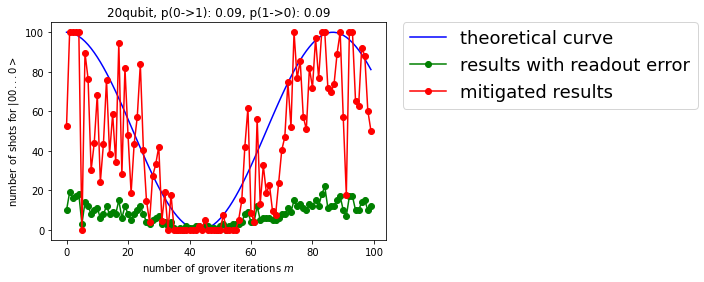

In [22]:
divide = 100
number_grover_list = [i for i in range(100)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, label="theoretical curve", color="blue")
plt.plot(number_grover_list, hit_list, marker="o", label="results with readout error", color="green")
plt.plot(number_grover_list, mit_hit_S_list, marker="o", label="mitigated results", color="red")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("20qubit, p(0->1): 0.09, p(1->0): 0.09")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

In [19]:
def CalcErrorCramérRao(M, shot_list, p0, number_grover_list):
    """
        calculate Cramér-Rao lower bound
            M: upper limit of the sum in Fisher information 
            shots_list:  list of number of shots
            p0: the true parameter value to be estimated
            numebr_grover_list: list of number of Grover operators        

        Return:
            square root of Cramér-Rao lower bound:  lower bound on the standard deviation of unbiased estimators
    """
    FisherInfo = 0
    for k in range(M + 1):
        Nk = shot_list[k]
        mk = number_grover_list[k]
        FisherInfo += Nk / (p0 * (1 - p0)) * (2 * mk + 1)**2
    return np.sqrt(1 / FisherInfo)


def CalcNumberOracleCalls(M, shot_list, number_grover_list):
    """
        calculate the total number of oracle calls
            M: upper limit of the sum in Fisher information 
            shots_list:  list of number of shots
            numebr_grover_list: list of number of Grover operators        

        Return:
            Norac: the total number of oracle calls
    """
    Norac = 0
    for k in range(M + 1):
        Nk = shots_list[k]
        mk = number_grover_list[k]
        Norac += Nk * (2 * mk + 1)
    return Norac

def calculate_theta(hit_list, number_grover_list, shots_list):
    """
        calculate optimal theta values
            hit_list: list of count of obserbving "1" for qc_list
            numebr_grover_list: list of number of Grover operators        
            shots_list: list of number of shots

        Return:
            thetaCandidate_list: list of optimal theta
    """

    small = 1.e-15  # small valued parameter to avoid zero division
    confidenceLevel = 5  # confidence level to determine the search range

    thetaCandidate_list = []
    rangeMin = 0.0 + small
    rangeMax = 1.0 - small
    for igrover in range(len(number_grover_list)):

        def loglikelihood(p): # search value
            ret = np.zeros_like(p)
            theta = np.arcsin(np.sqrt(p)) # search theta
            for n in range(igrover + 1):
                ihit = hit_list[n] # empirical value
                arg = (2 * number_grover_list[n] + 1) * theta # search angle
                ret = ret + 2 * ihit * np.log(np.abs(np.sin(arg))) + 2 * (
                    shots_list[n] - ihit) * np.log(np.abs(np.cos(arg))) # search log likelihood
            return -ret

        searchRange = (rangeMin, rangeMax)
        searchResult = optimize.brute(loglikelihood, [searchRange])
        pCandidate = searchResult[0]
        thetaCandidate_list.append(np.arcsin(np.sqrt(pCandidate)))
        perror = CalcErrorCramérRao(igrover, shots_list, pCandidate, number_grover_list)
        rangeMax = min(pCandidate+confidenceLevel*perror,1.0 - small)
        rangeMin = max(pCandidate-confidenceLevel*perror,0.0 + small)
    return thetaCandidate_list

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in arcsin


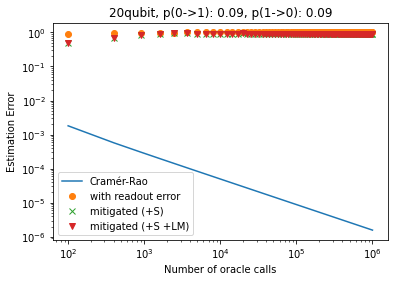

In [20]:
sin_hit_list = [100 - h for h in hit_list]
sin_mit_hit_S_list = [100 - h for h in mit_hit_S_list]
sin_mit_hit_S_lm_0_list = [100 - h for h in mit_hit_S_lm_0_list]

thetaCandidate_list = calculate_theta(
    sin_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_list = calculate_theta(
    sin_mit_hit_S_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_lm_0_list = calculate_theta(
    sin_mit_hit_S_lm_0_list, number_grover_list, shots_list)  # list of estimated theta values

error_list = np.abs(np.sin(thetaCandidate_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_list = np.abs(np.sin(thetaCandidate_mit_S_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_lm_0_list = np.abs(np.sin(thetaCandidate_mit_S_lm_0_list)**2 - discretizedResult)  # list of estimation errors
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

p = plt.plot( OracleCall_list, ErrorCramérRao_list)
p0 = plt.plot( OracleCall_list, error_list, 'o')
p2 = plt.plot( OracleCall_list, error_mit_S_list, 'x')
p3 = plt.plot( OracleCall_list, error_mit_S_lm_0_list, 'v')

plt.title("20qubit, p(0->1): 0.09, p(1->0): 0.09")
plt.xscale('log')
plt.xlabel("Number of oracle calls")
plt.yscale('log')
plt.ylabel("Estimation Error")
plt.legend((p[0], p0[0], p2[0], p3[0]), ("Cramér-Rao", "with readout error", "mitigated (+S)", "mitigated (+S +LM)"))
plt.show()

In [21]:
error_list

array([0.89965052, 0.96964333, 0.98656518, 0.99215414, 0.99472425,
       0.99680114, 0.99754424, 0.99807099, 0.99847058, 0.99872185,
       0.99889569, 0.99905006, 0.99915642, 0.99922147, 0.99929065,
       0.99934423, 0.99938397, 0.99940886, 0.99944193, 0.99946314,
       0.99948514, 0.99950622, 0.99952193, 0.99953417, 0.99954398,
       0.99955483, 0.99956591, 0.99957605, 0.99958412, 0.99959093,
       0.99959666, 0.99960293, 0.99960812, 0.99961318, 0.99961736,
       0.99962164, 0.99962558, 0.999629  , 0.9996322 , 0.99963493,
       0.99963733, 0.99963961, 0.99964158, 0.99964334, 0.99964509,
       0.99964663, 0.999648  , 0.99964935, 0.99965059, 0.99965181,
       0.9996528 , 0.99965366, 0.99965466, 0.99965542, 0.99965613,
       0.99965679, 0.9996574 , 0.99965794, 0.99965829, 0.99965859,
       0.99965906, 0.99965951, 0.99965966, 0.99966004, 0.99966038,
       0.99966069, 0.99966098, 0.99966131, 0.99966161, 0.99966188,
       0.99966209, 0.99966229, 0.99966242, 0.9996626 , 0.99966

In [22]:
error_mit_S_list

array([0.4767784 , 0.70145948, 0.84613936, 0.91548689, 0.94240811,
       0.93526812, 0.91831024, 0.9202101 , 0.9123538 , 0.91295825,
       0.91873095, 0.91843701, 0.91883624, 0.93081404, 0.91971553,
       0.92001524, 0.91599003, 0.91581328, 0.91889165, 0.91878297,
       0.91878655, 0.91893262, 0.91881353, 0.91886426, 0.91936226,
       0.91929586, 0.91928209, 0.91926598, 0.91929097, 0.91945002,
       0.91927004, 0.91921238, 0.91928075, 0.91931273, 0.91940018,
       0.92264708, 0.92075988, 0.91712765, 0.91818547, 0.91821948,
       0.92082174, 0.91987545, 0.91835319, 0.91834512, 0.91985519,
       0.91988829, 0.92062638, 0.92058037, 0.9205675 , 0.92056748,
       0.9205775 , 0.92060985, 0.92002317, 0.91847928, 0.91848007,
       0.9200095 , 0.92002844, 0.92051645, 0.92050182, 0.92050802,
       0.9205246 , 0.92053014, 0.92053712, 0.9219359 , 0.92007979,
       0.92008524, 0.92008216, 0.92009271, 0.9204917 , 0.9204764 ,
       0.92047743, 0.92053925, 0.92053129, 0.92053588, 0.92053

In [23]:
thetaCandidate_mit_S_lm_0_list

[0.7624974766031524,
 0.993109560205633,
 1.168175185209378,
 1.276417860583835,
 1.3291547721056258,
 1.3142128351915492,
 1.2815413743392887,
 1.2850347347388542,
 1.2708227392289697,
 1.2718950149731054,
 1.2823117129887625,
 1.2817733002983505,
 1.2825047898222361,
 1.305281345217749,
 1.2841217082528733,
 1.2846747030171501,
 1.2773251189011028,
 1.2770061178540262,
 1.282606439979923,
 1.2824071009459077,
 1.2824136593337843,
 1.2826816395537268,
 1.2824631394471278,
 1.2825561932971874,
 1.2834711162297923,
 1.283348980037945,
 1.2833236558473697,
 1.2832940280333847,
 1.2833399897366635,
 1.2836326086985181,
 1.2833014860532832,
 1.2831954829507068,
 1.2833211807192195,
 1.2833800126244932,
 1.2835408884681156,
 1.2895721092266497,
 1.286052734601683,
 1.2793856411141702,
 1.2813132522803434,
 1.2813754178575318,
 1.2861674968989742,
 1.284416652754339,
 1.28161993786445,
 1.2816051661163073,
 1.284379283768139,
 1.2844403552314958,
 1.2858052575842789,
 1.285720000993893,
 1.2